# Segmentation Analysis

Analize the segmentation quality over the entire dataset

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.style.use('seaborn-ticks')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 16

In [12]:
ds = pd.read_csv('data/wdds_all.csv')
print(ds.shape)
print(ds.columns)

(7587, 14)
Index(['row_id', 'page_id', 'page_title', 'contributor', 'timestamp',
       'creation_dt', 'topic', 'opinion', 'turn', 'quality_seg', 'type',
       'stance', 'sentiment', 'url'],
      dtype='object')


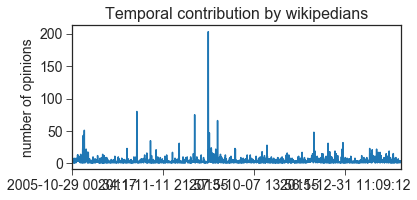

In [13]:
ts = ds.groupby(['creation_dt']).size()
plt.figure(figsize=(6,3))
ts.plot()
plt.xlabel('')
plt.ylabel('number of opinions')
plt.title('Temporal contribution by wikipedians')
plt.tight_layout()
plt.savefig('output/temporalauthorcontribdist.eps', format='eps')

## more than one wikipedian edited an opinion

In [14]:
wikipedians=ds[ds.contributor.str.contains(',')]
print(wikipedians.shape)
print(ds.shape)
print(wikipedians.shape[0]/ds.shape[0])

(257, 14)
(7587, 14)
0.033873731382628176


## multiple turns created in the same edit

In [15]:
turns = ds.apply(lambda r: str(r['page_id']) + str(r['turn']), 1)
turns = turns.nunique()
mturns = ds.groupby('creation_dt').agg({"turn": pd.Series.nunique}).reset_index()
dsmt =mturns[mturns.turn>2]
mturns = dsmt.shape[0]
print(turns)
print(mturns)
print(mturns/turns)
dsmt.head()

2438
122
0.05004101722723544


,creation_dt,turn
59,2006-11-13 15:41:06,3
61,2006-11-13 17:28:21,9
63,2006-11-13 19:37:56,8
64,2006-11-13 20:22:43,12
65,2006-11-13 22:26:42,11


In [16]:
ds.contributor.nunique()

739

In [17]:
ds.turn.nunique()

575

## segmentation analysis for annotated opinions

In [18]:
ds = pd.read_csv('data/wdds.csv')
print(ds.shape)
print(ds.columns)

(2097, 20)
Index(['row_id', 'page_id', 'page_title', 'contributor', 'timestamp',
       'creation_dt', 'topic', 'opinion', 'clean_opinion', 'turn',
       'segmentation', 'type', 'subtype', 'type_r1', 'subtype_r1', 'type_r2',
       'subtype_r2', 'stance', 'sentiment', 'url'],
      dtype='object')


In [19]:
ds.segmentation.unique()

array(['OK', 'ERROR'], dtype=object)

In [20]:
total_opinions = ds.shape[0] 
errors = ds.groupby(['segmentation']).size()
errors = errors / total_opinions
errors


segmentation
ERROR    0.06867
OK       0.93133
dtype: float64